# Exercise 6: Neural Networks

In [12]:
import numpy as np
import matplotlib.pyplot as plt

We are using again the wine-data from Exercise 4, but now building a neural network for prediction.

In [2]:
# load all examples from the file
data = np.genfromtxt('winequality-white.csv',delimiter=";",skip_header=1)

print("data:", data.shape)

# Prepare for proper training
np.random.shuffle(data) # randomly sort examples

# take the first 3000 examples for training
X_train = data[:3000,:11] # all features except last column
y_train = data[:3000,11]  # quality column

# and the remaining examples for testing
X_test = data[3000:,:11] # all features except last column
y_test = data[3000:,11] # quality column

print("First example:")
print("Features:", X_train[0])
print("Quality:", y_train[0])

data: (4898, 12)
First example:
Features: [6.600e+00 1.900e-01 4.100e-01 8.900e+00 4.600e-02 5.100e+01 1.690e+02
 9.954e-01 3.140e+00 5.700e-01 9.800e+00]
Quality: 6.0


# Homework

The goal is to mplement the training of a neural network with one input layer, one hidden layer and one output layer using gradient descent. 
   * Define the matrices and initialise with random values. We need W,b,W' and b'. The shapes should be:
     * W: (number of hidden nodes, number of inputs) named `W`
     * b: (number of hidden nodes) named `b`
     * W': (number of hidden nodes) named `Wp`
     * b': (one) named `bp`
   * Implement a forward pass of the network as `dnn` (see below)
   * Implement a function that uses one example to update the weights using gradient descent. You can follow the `update_weights` skeleton below
   * Now you can use the code below (training loop and evaluation) to train the network for multiple epochs. Try to find a set of hyperparameters (number of nodes in the hidden layer, learning rate, number of training epochs) that gives stable results. What is the best result (as measured by the loss on the training sample) you can get?

In [3]:
# You can use this implementation of the ReLu activation function
def relu(x):
    return np.maximum(x, 0)

In [4]:
hidden_nodes = 50

W = np.random.randn(hidden_nodes,11)*np.sqrt(2./11)
b = np.random.randn(hidden_nodes)*np.sqrt(2./11)
Wp = np.random.randn(hidden_nodes)*np.sqrt(2./hidden_nodes)
bp = np.random.randn((1))

lr = 0.000005


train_losses = []
test_losses = []

In [ ]:
def dnn(x,W,b,Wp,bp):
    # Calculate and return network output of forward pass
    return np.dot(Wp, relu(np.dot(W,x) + b)) + bp

In [ ]:
def update_weights(x,y, W, b, Wp, bp):
    
    # Calculate the network output
    
    # Use the formulas derived to calculate the gradient for each of W,b,Wp,bp
    
    # Update the weights/bias following the rule:  X_new = X_old - learning_rate * gradient
    

In [5]:
def update_weights(x,y, W, b, Wp, bp):
    
    # Calculate the network output
    phi = dnn(x,W,b,Wp,bp)

    # Use the formulas derived to calculate the gradient for each of W,b,Wp,bp
    delta_bp = 2 * (phi - y)
    delta_Wp = 2 * (phi - y) * relu(np.dot(W,x) + b)
    delta_b  = 2 * (phi - y) * Wp * np.heaviside(np.dot(W,x) + b, 0.5)
    delta_W  = 2 * (phi - y) * np.outer(Wp * np.heaviside(np.dot(W,x) + b, 0.5), x)
          
    # Update the weights/bias following the rule:  X_new = X_old - learning_rate * gradient    
    bp -= lr * delta_bp
    Wp -= lr * delta_Wp
    b  -= lr * delta_b
    W  -= lr * delta_W


# Training loop and evaluation below

Epoch: 0 Train Loss: 0.6276763491725015 Test Loss: 0.6462291935683923
Best loss: 0.5848485857988583 Final loss: 0.6462291935683923
Correlation coefficient: 0.5037907844764149


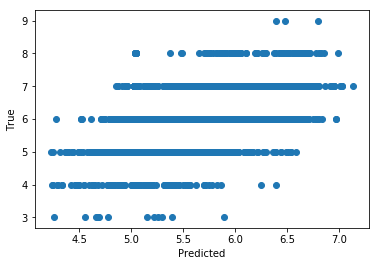

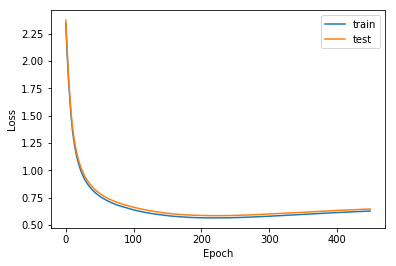

In [24]:
# how many epochs to train
n_epochs = 1 # This will just train for one epoch. You will want a higher number

# Loop over the epochs
for ep in range(n_epochs):
        
    # Each epoch is a complete over the training data
    for i in range(X_train.shape[0]):
        
        # pick one example
        x = X_train[i]
        y = y_train[i]

        # use it to update the weights
        update_weights(x,y,W,b,Wp,bp)
    
    # Calculate predictions for the full training and testing sample
    y_pred_train = [dnn(x,W,b,Wp,bp)[0] for x in X_train]
    y_pred = [dnn(x,W,b,Wp,bp)[0] for x in X_test]

    # Calculate aver loss / example over the epoch
    train_loss = sum((y_pred_train-y_train)**2) / y_train.shape[0]
    test_loss = sum((y_pred-y_test)**2) / y_test.shape[0] 
    
    # print some information
    print("Epoch:",ep, "Train Loss:", train_loss, "Test Loss:", test_loss)
    
    # and store the losses for later use
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    
    
# After the training:
    
# Prepare scatter plot


y_pred = [dnn(x,W,b,Wp,bp)[0] for x in X_test]

print("Best loss:", min(test_losses), "Final loss:", test_losses[-1])

print("Correlation coefficient:", np.corrcoef(y_pred,y_test)[0,1])
plt.scatter(y_pred_train,y_train)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Prepare and loss over time
plt.plot(train_losses,label="train")
plt.plot(test_losses,label="test")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()
